# Classification Models to Pedict Political Party

I will be using this notebook to perform multiple classifications to predict political party based on variables such as age, income, debt levels etc.

## Task 1

I ran the cookiecutter-datascience-simple template to create a folder structure for this exercise. This folder is named hw1 and contains jupyter notebooks, README file and output folder to contain all my outputs for this analysis.

## Task 2

I put this folder under version control with git. I did not put the data file under version control as advised but did for all .md and .ipynb files including this notebook.

## Task 3

## 1.1 Preliminaries

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [3]:
%matplotlib inline

## 1.2 Read in raw data

Reading in the raw data using pandas dataframe

In [4]:
tax_data = pd.read_csv("./data/raw/TaxInfo.csv")

In [5]:
tax_data

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed_2017,Filed_2016,Filed_2015,PoliticalParty
0,49685,227187,0,0,105,0,1,1,1,Democrat
1,64756,-507342,2,3,68,3,1,0,0,Independent
2,115435,521290,1,3,81,2,0,1,0,Republican
3,99454,251829,2,1,52,4,1,0,0,Republican
4,157274,-472337,0,1,28,1,1,0,1,Independent
...,...,...,...,...,...,...,...,...,...,...
999,37626,20830,0,1,38,4,0,1,0,Democrat
1000,79765,63483,2,1,71,5,0,1,0,Republican
1001,111219,-573449,0,4,35,2,0,0,0,Republican
1002,105591,-611207,0,1,59,1,1,1,0,Republican


## 1.3 Initial EDA

We will be doing some EDA to get familiar with some of the variables to predict Political Party.

In [6]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HHI             1004 non-null   int64 
 1   HHDL            1004 non-null   int64 
 2   Married         1004 non-null   int64 
 3   CollegGrads     1004 non-null   int64 
 4   AHHAge          1004 non-null   int64 
 5   Cars            1004 non-null   int64 
 6   Filed_2017      1004 non-null   int64 
 7   Filed_2016      1004 non-null   int64 
 8   Filed_2015      1004 non-null   int64 
 9   PoliticalParty  1004 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.6+ KB


In [7]:
tax_data.iloc[:6, :10]

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed_2017,Filed_2016,Filed_2015,PoliticalParty
0,49685,227187,0,0,105,0,1,1,1,Democrat
1,64756,-507342,2,3,68,3,1,0,0,Independent
2,115435,521290,1,3,81,2,0,1,0,Republican
3,99454,251829,2,1,52,4,1,0,0,Republican
4,157274,-472337,0,1,28,1,1,0,1,Independent
5,235312,807659,2,2,45,0,1,0,0,Democrat


In [8]:
tax_data.columns.tolist()

['HHI',
 'HHDL',
 'Married',
 'CollegGrads',
 'AHHAge',
 'Cars',
 'Filed_2017',
 'Filed_2016',
 'Filed_2015',
 'PoliticalParty']

## 1.4 Automated EDA

### 1.4.1 Pandas Profiling

In [169]:
from pandas_profiling import ProfileReport

In [170]:
profile = ProfileReport(tax_data, title="Pandas Profiling Report")

In [88]:
profile.to_file("output/pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\libbypirinis\anaconda3\envs\aap\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.4.2 Sweetviz



In [9]:
import sweetviz

In [90]:
report = sweetviz.analyze(tax_data)

                                             |                                             | [  0%]   00:00 ->…

In [91]:
report.show_html("output/sweetviz_report.html")

Report output/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 1.4.3 Exploring the target variable (PoliticalParty)

In [10]:
tax_data.groupby(['PoliticalParty']).size()

PoliticalParty
Democrat       336
Independent    337
Republican     331
dtype: int64

In [11]:
tax_data['PoliticalParty'].value_counts(normalize=True)

Independent    0.335657
Democrat       0.334661
Republican     0.329681
Name: PoliticalParty, dtype: float64

In [12]:
tax_data[tax_data.Cars > 0]['PoliticalParty'].value_counts(normalize=True)

Independent    0.337349
Democrat       0.331325
Republican     0.331325
Name: PoliticalParty, dtype: float64

### 1.4.4 Exploring the numeric variables

Looking at the pandas and sweetviz reporting we see most values in the dataset are numeric: HHI, HHDL, College Grads, AHH Age and Cars. Tax filing status are described as Boolean. Categorical variables include "Married" (3 levels) and the target variable "political party" (3 levels).

We see below however that "Married" are being lumped under "numeric" so below we are changing it to categorical.

In [13]:
tax_data.select_dtypes(include=np.number).columns.tolist()

['HHI',
 'HHDL',
 'Married',
 'CollegGrads',
 'AHHAge',
 'Cars',
 'Filed_2017',
 'Filed_2016',
 'Filed_2015']

In [14]:
tax_data["Married"] = tax_data["Married"].astype("category")

In [15]:
tax_data.select_dtypes(include=np.number).columns.tolist()

['HHI',
 'HHDL',
 'CollegGrads',
 'AHHAge',
 'Cars',
 'Filed_2017',
 'Filed_2016',
 'Filed_2015']

In [16]:
tax_data.groupby('AHHAge')['PoliticalParty'].value_counts(normalize=True)

AHHAge  PoliticalParty
18      Republican        0.545455
        Independent       0.363636
        Democrat          0.090909
19      Independent       0.666667
        Democrat          0.166667
                            ...   
104     Democrat          0.272727
        Republican        0.181818
105     Democrat          0.400000
        Independent       0.400000
        Republican        0.200000
Name: PoliticalParty, Length: 261, dtype: float64

In [17]:
pp_age = pd.crosstab(tax_data['AHHAge'], tax_data['PoliticalParty'], normalize='index')
pp_age

PoliticalParty,Democrat,Independent,Republican
AHHAge,,,
18,0.090909,0.363636,0.545455
19,0.166667,0.666667,0.166667
20,0.416667,0.250000,0.333333
21,0.333333,0.250000,0.416667
22,0.285714,0.285714,0.428571
...,...,...,...
101,0.333333,0.466667,0.200000
102,0.466667,0.333333,0.200000
103,0.333333,0.333333,0.333333


<AxesSubplot:xlabel='AHHAge'>

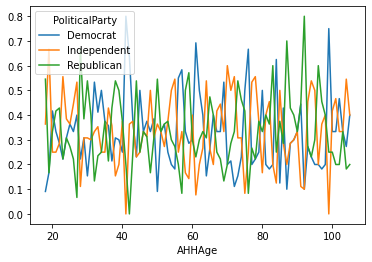

In [18]:
pp_age[pp_age.index > 0].plot(kind='line')

### 1.4.5 Dealing with Missing Data

When going through the pandas profiing and sweetviz reporting we saw that while there were many zeros there was a lack of missing data from the dataset. I therefore decided not to repkace anything and to move into data exploration.

## 1.5 Data Partitioning and Model Fitting

### 1.5.1 Creating training and test data

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [24]:
X = tax_data.iloc[:, 0:9]
y = tax_data.iloc[:, 9]

In [25]:
X

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed_2017,Filed_2016,Filed_2015
0,49685,227187,0,0,105,0,1,1,1
1,64756,-507342,2,3,68,3,1,0,0
2,115435,521290,1,3,81,2,0,1,0
3,99454,251829,2,1,52,4,1,0,0
4,157274,-472337,0,1,28,1,1,0,1
...,...,...,...,...,...,...,...,...,...
999,37626,20830,0,1,38,4,0,1,0
1000,79765,63483,2,1,71,5,0,1,0
1001,111219,-573449,0,4,35,2,0,0,0
1002,105591,-611207,0,1,59,1,1,1,0


In [26]:
y

0          Democrat
1       Independent
2        Republican
3        Republican
4       Independent
           ...     
999        Democrat
1000     Republican
1001     Republican
1002     Republican
1003     Republican
Name: PoliticalParty, Length: 1004, dtype: object

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [28]:
X_train

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed_2017,Filed_2016,Filed_2015
795,115748,76553,2,3,41,4,0,0,1
467,222201,-821484,0,1,26,2,0,0,0
459,164922,-320332,1,5,31,4,0,0,1
72,64682,597517,0,5,38,4,1,0,0
404,254495,-411697,0,1,32,4,0,0,0
...,...,...,...,...,...,...,...,...,...
48,116646,-975842,2,5,36,5,0,0,0
772,276138,868661,0,2,37,3,1,1,1
824,116461,-862151,1,5,77,4,0,1,0
207,238290,-449582,2,0,80,0,1,1,0


In [29]:
X_test

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed_2017,Filed_2016,Filed_2015
213,288968,-211093,2,1,25,0,0,1,1
553,20442,-859712,2,2,93,1,1,0,0
187,167963,-243890,0,2,92,4,1,0,0
777,216098,969316,2,4,59,2,1,1,0
828,55143,454260,1,4,47,0,0,0,1
...,...,...,...,...,...,...,...,...,...
360,96645,591443,0,2,35,0,0,1,1
732,125407,-802588,1,5,92,0,0,1,0
488,3892,673976,0,5,82,4,0,1,0
855,229221,-600998,2,4,59,5,0,1,1


In [30]:
y_train

795       Democrat
467     Republican
459     Republican
72        Democrat
404       Democrat
          ...     
48        Democrat
772    Independent
824       Democrat
207       Democrat
969     Republican
Name: PoliticalParty, Length: 803, dtype: object

In [31]:
y_test

213       Democrat
553    Independent
187     Republican
777     Republican
828       Democrat
          ...     
360       Democrat
732     Republican
488     Republican
855       Democrat
379     Republican
Name: PoliticalParty, Length: 201, dtype: object

## 1.5 Variable Type Lists

In [32]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   HHI             1004 non-null   int64   
 1   HHDL            1004 non-null   int64   
 2   Married         1004 non-null   category
 3   CollegGrads     1004 non-null   int64   
 4   AHHAge          1004 non-null   int64   
 5   Cars            1004 non-null   int64   
 6   Filed_2017      1004 non-null   int64   
 7   Filed_2016      1004 non-null   int64   
 8   Filed_2015      1004 non-null   int64   
 9   PoliticalParty  1004 non-null   object  
dtypes: category(1), int64(8), object(1)
memory usage: 71.8+ KB


In [33]:
tax_data.dtypes

HHI                  int64
HHDL                 int64
Married           category
CollegGrads          int64
AHHAge               int64
Cars                 int64
Filed_2017           int64
Filed_2016           int64
Filed_2015           int64
PoliticalParty      object
dtype: object

In [34]:
categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()
categorical_cols

['Married']

PoliticalParty is classified as 'object',we do not end up doing any pre-processing on it as it is our target variable.

In [35]:
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['HHI',
 'HHDL',
 'CollegGrads',
 'AHHAge',
 'Cars',
 'Filed_2017',
 'Filed_2016',
 'Filed_2015']

In [36]:
all_cols = X_train.columns.tolist()
all_cols

['HHI',
 'HHDL',
 'Married',
 'CollegGrads',
 'AHHAge',
 'Cars',
 'Filed_2017',
 'Filed_2016',
 'Filed_2015']

In [37]:
assert len(all_cols) == len(categorical_cols) + len(numeric_cols)

When we run the cell above, nothing happens which is a goood sign as the condition is true and all cols are accounted for.

In [38]:
categorical_cols_idx = [X_train.columns.get_loc(c) for c in categorical_cols]
categorical_cols_idx

[2]

In [39]:
numeric_cols_idx = [X_train.columns.get_loc(c) for c in numeric_cols]
numeric_cols_idx

[0, 1, 3, 4, 5, 6, 7, 8]

In [40]:
X_train.iloc[:, categorical_cols_idx].nunique()

Married    3
dtype: int64

## 1.6 Regularization for Regression Modelling

### 1.6.1 Logistic Regression Pipeline

In [41]:
categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

all_cols = X_train.columns.tolist()

In [42]:
assert len(all_cols) == len(categorical_cols) + len(numeric_cols)

In [43]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

Now we are creating a pipeline for this processed data. See classifier model below:

In [105]:
clf_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=1000)

In [106]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

### 1.6.2 Data partitioning and model fitting

In [107]:
clf.fit(X_train, y_train) #clf is pipeline we created in previous step for L2

print(f"Training score: {clf.score(X_train, y_train):.3f}")
print(f"Test score: {clf.score(X_test, y_test):.3f}")

Training score: 0.390
Test score: 0.313


We see that the test score is less than the training score which makes sense in the context of this dataset. These scores however are relatively low. We can adjust the model to improve performance. Tested liblinear, newton-cg and saga for clf and result were no better. Decided to stick with saga going forward.

In [89]:
def coef_plot(model, title=None):
    fig, ax = plt.subplots(3, sharex=True)
       
    if title:
        ax[0].set_title(title)

    for i in range(3):
        ax[i].plot(model.steps[1][1].coef_[i])

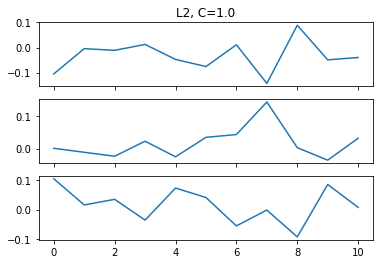

In [84]:
coef_plot(clf, 'L2, C=1.0')

In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Confusion matrix for train, without normalization
[[110  82  75]
 [ 80 109  77]
 [ 89  87  94]]
Normalized confusion matrix for train
[[0.41198502 0.3071161  0.28089888]
 [0.30075188 0.40977444 0.28947368]
 [0.32962963 0.32222222 0.34814815]]


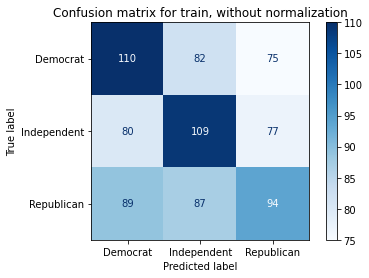

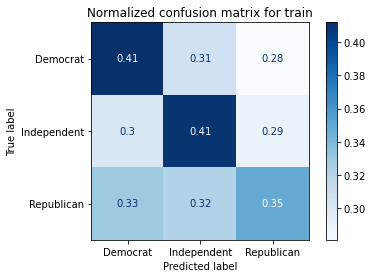

In [130]:
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[17 32 20]
 [26 25 20]
 [19 21 21]]
Normalized confusion matrix for test
[[0.24637681 0.46376812 0.28985507]
 [0.36619718 0.35211268 0.28169014]
 [0.31147541 0.3442623  0.3442623 ]]


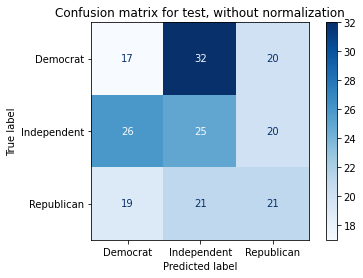

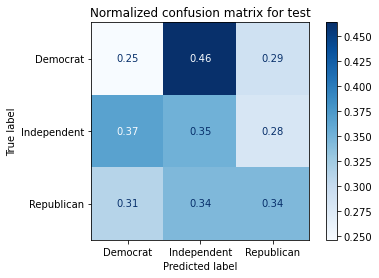

In [131]:
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [85]:
clf_model_02 = LogisticRegression(penalty='l2', C=0.01, solver='saga', max_iter=500)

In [86]:
clf_02 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_02)])

In [87]:
clf_02.fit(X_train, y_train)

print(f"Training score: {clf_02.score(X_train, y_train):.3f}")
print(f"Test score: {clf_02.score(X_test, y_test):.3f}")

Training score: 0.400
Test score: 0.308


In [88]:
clf_02.named_steps['classifier'].coef_.shape

(3, 11)

Three vectors of coefficients and there are 11 variables (3 possible outcomes for the target variable). We see however that in the scoring while the training set improved the tesdt data did not. It actually went down in accuracy.

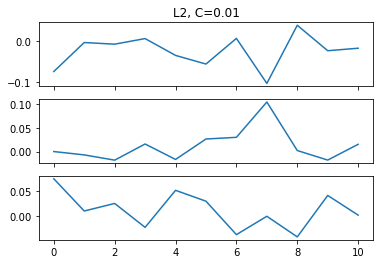

In [90]:
coef_plot(clf_02, 'L2, C=0.01')

Confusion matrix for train, without normalization
[[111  82  74]
 [ 75 113  78]
 [ 89  84  97]]
Normalized confusion matrix for train
[[0.41573034 0.3071161  0.27715356]
 [0.28195489 0.42481203 0.29323308]
 [0.32962963 0.31111111 0.35925926]]


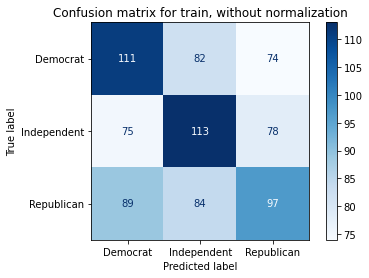

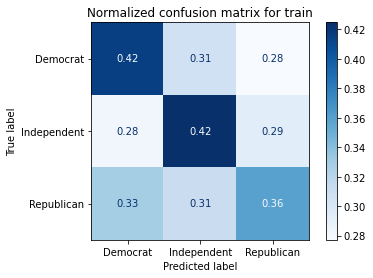

In [132]:
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_02['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_02, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[18 30 21]
 [25 26 20]
 [21 22 18]]
Normalized confusion matrix for test
[[0.26086957 0.43478261 0.30434783]
 [0.35211268 0.36619718 0.28169014]
 [0.3442623  0.36065574 0.29508197]]


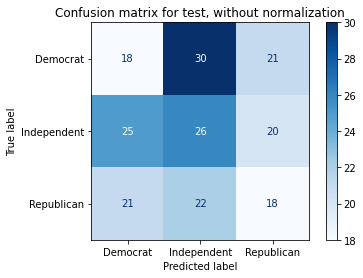

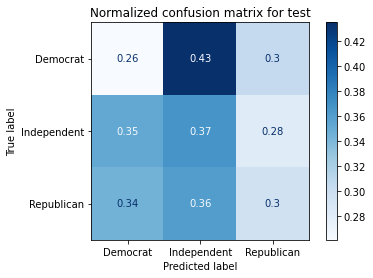

In [133]:
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf_02['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_02, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [91]:
# Classifier model with L1
clf_model_l1_C001 = LogisticRegression(penalty='l1', C=0.001, solver='saga', max_iter=500)

In [92]:
# Append classifier to preprocessing pipeline.
clf_l1_C001 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_l1_C001)])

In [93]:
# Fit model on training data 
clf_l1_C001.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['HHI', 'HHDL', 'CollegGrads',
                                                   'AHHAge', 'Cars',
                                                   'Filed_2017', 'Filed_2016',
                                                   'Filed_2015']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Married'])])),
                ('classifier',
                 LogisticRegression(C=0.001, max_iter=500, penalty='l1',
                                    solver='saga'))])

In [94]:
print(f"Training score: {clf_l1_C001.score(X_train, y_train):.3f}")
print(f"Test score: {clf_l1_C001.score(X_test, y_test):.3f}")

Training score: 0.333
Test score: 0.343


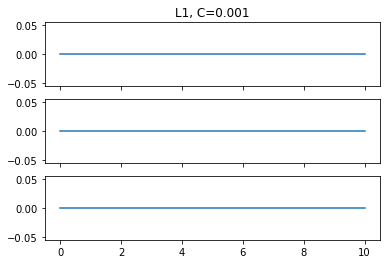

In [68]:
coef_plot(clf_l1_C001, 'L1, C=0.001')

We see that when we make the L1 at 0.001 it over normalizes the data and doess not render a better result. This is a classic example of overfitting.

Confusion matrix for train, without normalization
[[267   0   0]
 [266   0   0]
 [270   0   0]]
Normalized confusion matrix for train
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


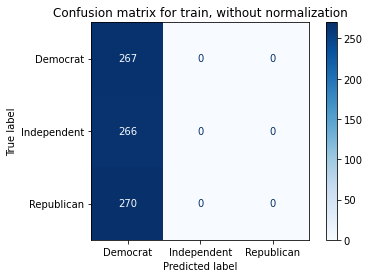

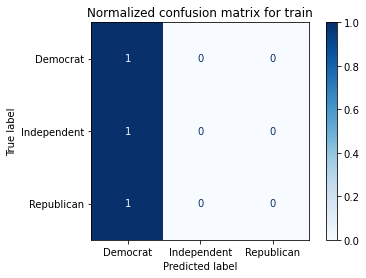

In [134]:
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_l1_C001['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_l1_C001, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[69  0  0]
 [71  0  0]
 [61  0  0]]
Normalized confusion matrix for test
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


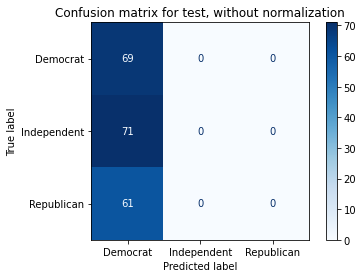

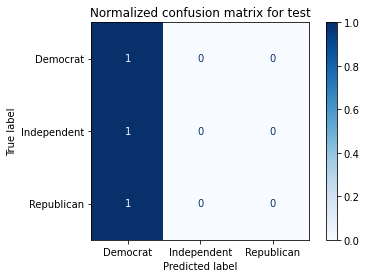

In [135]:
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf_l1_C001['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_l1_C001, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Final logistic regression classifier model ended up with C=0.01 and ridge regression as regularization not super helpful for this model after trial and error however this slight aleration makes it a bit more accurate which is what we want. Also changing the max iterations to 1000 did not help the model. It seems like the training data has the highest accuracy of 0.40 with this combination of factors.

In [136]:
clf_LR_model_final = LogisticRegression(penalty='l2', C=0.01, solver='saga', max_iter=500)

In [137]:
clf_LR_final = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_LR_model_final)])

In [138]:
# Fit model on training data 
clf_LR_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['HHI', 'HHDL', 'CollegGrads',
                                                   'AHHAge', 'Cars',
                                                   'Filed_2017', 'Filed_2016',
                                                   'Filed_2015']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Married'])])),
                ('classifier',
                 LogisticRegression(C=0.01, max_iter=500, solver='saga'))])

In [139]:
clf_LR_final_predictions = clf_LR_final.predict(X_test)
print(clf_LR_final_predictions[:10])

['Independent' 'Democrat' 'Republican' 'Republican' 'Democrat'
 'Republican' 'Independent' 'Democrat' 'Democrat' 'Democrat']


## 1.7 Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(oob_score=True, random_state=21))])

In [117]:
clf_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['HHI', 'HHDL', 'CollegGrads',
                                                   'AHHAge', 'Cars',
                                                   'Filed_2017', 'Filed_2016',
                                                   'Filed_2015']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Married'])])),
                ('classifier',
                 RandomForestClassifier(oob_score=True, random_state=21))])

In [118]:
print(f"Training score: {clf_rf.score(X_train, y_train):.3f}")
print(f"Test score: {clf_rf.score(X_test, y_test):.3f}")

Training score: 1.000
Test score: 0.373


We see a huge improvement here on the model perforance, perfect accuracy score on the training data while the test data only improves by a small amount, we can build a confusion matrix for greater detail.

Confusion matrix for train, without normalization
[[267   0   0]
 [  0 266   0]
 [  0   0 270]]
Normalized confusion matrix for train
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


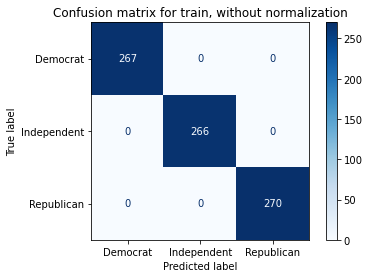

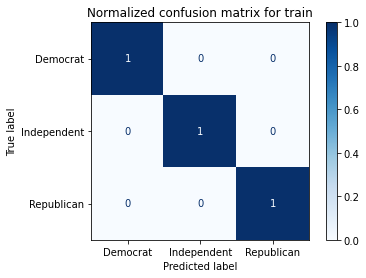

In [120]:
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_rf['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[24 23 22]
 [25 29 17]
 [21 18 22]]
Normalized confusion matrix for test
[[0.34782609 0.33333333 0.31884058]
 [0.35211268 0.4084507  0.23943662]
 [0.3442623  0.29508197 0.36065574]]


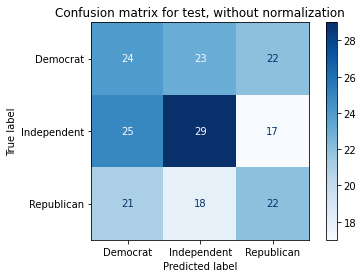

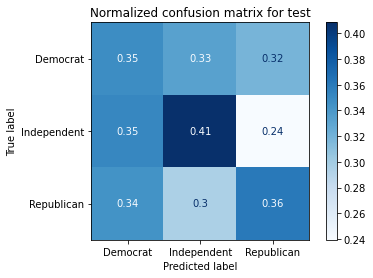

In [121]:
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf_rf['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [122]:
clf_RF_model_final = RandomForestClassifier(oob_score=True, random_state=21)

In [123]:
clf_RF_final = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_RF_model_final)])

In [124]:
clf_RF_final.fit(X_train, y_train)
print("Training score: %.3f" % clf_RF_final.score(X_train, y_train))

Training score: 1.000


In [125]:
clf_RF_final_predictions = clf_RF_final.predict(X_test)
print(clf_RF_final_predictions[:10])

['Independent' 'Independent' 'Republican' 'Republican' 'Independent'
 'Independent' 'Republican' 'Democrat' 'Democrat' 'Democrat']


Since this is the best model I will save it into a pickle file to access in another notebook.

In [127]:
import pickle

In [128]:
models_clf_rf = {'clf_LR': clf_LR_final,
                'clf_RF': clf_RF_final}

with open("output/models_clf_rf.pkl", "wb") as model_file:
    pickle.dump(models_clf_rf, model_file)